# Proyecto 1 - Mineria de datos
## Explorando patrones de robos por edad de las victimas en Guatemala

### Autores:
#### Andrés de la Roca
#### Jun Woo Lee

### Analisis exploratorio

In [62]:
import pandas as pd
import matplotlib as plt
import seaborn as sns
import numpy as np

from quickda.explore_data import *
from quickda.clean_data import *
from quickda.explore_numeric import *
from quickda.explore_categoric import *
from quickda.explore_numeric_categoric import *
from quickda.explore_time_series import *

#### Importar la data

In [63]:
# Importacion de csv a dataframe
data2012 = pd.read_csv('./data_hechos_delictivos/data_formato_csv/robos2012.csv')
data2013 = pd.read_csv('./data_hechos_delictivos/data_formato_csv/robos2013.csv')
data2014 = pd.read_csv('./data_hechos_delictivos/data_formato_csv/robos2014.csv')
data2015 = pd.read_csv('./data_hechos_delictivos/data_formato_csv/robos2015.csv')
data2016 = pd.read_csv('./data_hechos_delictivos/data_formato_csv/robos2016.csv')
data2017 = pd.read_csv('./data_hechos_delictivos/data_formato_csv/robos2017.csv')
data2018 = pd.read_csv('./data_hechos_delictivos/data_formato_csv/robos2018.csv')
data2019 = pd.read_csv('./data_hechos_delictivos/data_formato_csv/robos2019.csv')
data2020 = pd.read_csv('./data_hechos_delictivos/data_formato_csv/robos2020.csv')
data2021 = pd.read_csv('./data_hechos_delictivos/data_formato_csv/robos2021.csv')

# Concatenacion de los dataframes en uno general
datageneral = pd.concat([data2012, data2013, data2014, data2015, data2016, data2017, data2018, data2019, data2020, data2021])


display(datageneral)

,rango_edad,robo_vehiculos,robo_motocicletas,robo_armasfuego,robo_peatones,robo_residencias,robo_comercios,robo_buses
0,<15,1,-,-,33,1,-,-
1,15-19,83,277,30,279,16,17,6
2,20-24,624,1212,119,373,102,88,9
3,25-29,883,1042,234,308,152,103,27
4,30-34,1102,782,329,256,183,142,18
...,...,...,...,...,...,...,...,...
6,40-44,93,95,40,52,30,38,1
7,45-49,65,60,33,29,28,20,-
8,50-54,44,30,17,12,23,19,-
9,55-59,34,24,5,12,14,15,-


#### Limpieza de variables

<AxesSubplot: >

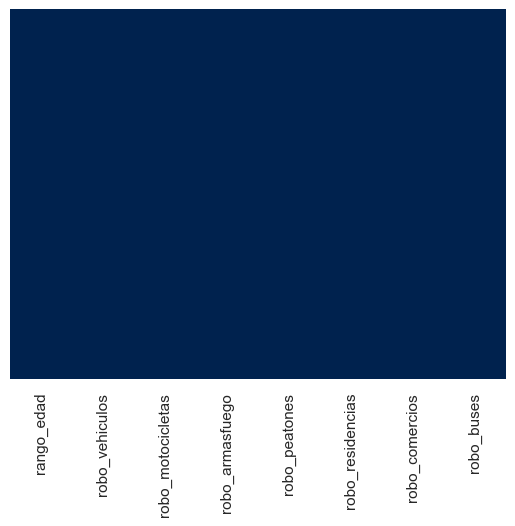

In [64]:
# Chequear por valores nulos
sns.heatmap(datageneral.isnull(), yticklabels=False, cbar=False, cmap='cividis')

In [65]:
# Cambiar valores "-" por 0
for column in datageneral:
    datageneral[column] = datageneral[column].replace('-', 0)
    if column != 'rango_edad':
        datageneral[column] = datageneral[column].astype(int)

In [66]:
# Cambiar los tipos de las columnas a los correctos
datageneral = clean(datageneral, method='dtypes', columns=['robo_vehiculos', 'robo_motocicletas', 'robo_armasfuego', 'robo_residencias', 'robo_comercios', 'robo_buses'], dtype='int')

In [67]:
# Chequear los tipos de cada columna
datageneral.dtypes

rango_edad           object
robo_vehiculos        int32
robo_motocicletas     int32
robo_armasfuego       int32
robo_peatones         int32
robo_residencias      int32
robo_comercios        int32
robo_buses            int32
dtype: object

In [68]:
display(datageneral)

,rango_edad,robo_vehiculos,robo_motocicletas,robo_armasfuego,robo_peatones,robo_residencias,robo_comercios,robo_buses
0,<15,1,0,0,33,1,0,0
1,15-19,83,277,30,279,16,17,6
2,20-24,624,1212,119,373,102,88,9
3,25-29,883,1042,234,308,152,103,27
4,30-34,1102,782,329,256,183,142,18
...,...,...,...,...,...,...,...,...
6,40-44,93,95,40,52,30,38,1
7,45-49,65,60,33,29,28,20,0
8,50-54,44,30,17,12,23,19,0
9,55-59,34,24,5,12,14,15,0


### Analisis por clustering

In [ ]:
# Utilizar datageneral para el clustering